In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# The data

In [2]:
def generate_data(n_1, n_2, n_dim=2):
    # Skew the data
    mean_1 = np.array([0, 1])
    al_1 = 70 * 2 * np.pi / 360
    s_11 = 0.2
    s_12 = 1.0
    sigma_1 = np.array([[s_11 * np.cos(al_1), s_12 * np.sin(al_1)], [-s_11 * np.sin(al_1), s_12 * np.cos(al_1)]])

    mean_2 = np.array([1.5, 0])
    al_2 = 60 * 2 * np.pi / 360
    s_21 = 0.2
    s_22 = 1.0
    sigma_2 = np.array([[s_21 * np.cos(al_2), s_22 * np.sin(al_2)], [-s_21 * np.sin(al_2), s_22 * np.cos(al_2)]])

    # Generate uniform Gaussian distributions, then rotate and move
    data_1 = np.matmul(sigma_1, np.random.randn(n_1, n_dim, 1)).reshape(-1, n_dim) + mean_1
    data_2 = np.matmul(sigma_2, np.random.randn(n_2, n_dim, 1)).reshape(-1, n_dim) + mean_2
    
    # Dataset: Features and labels
    features = np.concatenate([data_1, data_2])
    labels = np.array([-1] * n_1 + [1] * n_2)

    return features, labels

np.random.seed(23905)
features, labels = generate_data(150, 150)

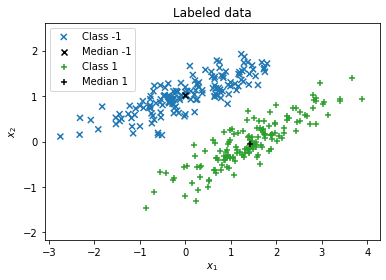

In [3]:
def plot_prediction(features, y_true, y_predicted):
    labels = np.unique(y_true)
    for i, (label, marker) in enumerate(zip(labels, "x+*.")):
        class_data = features[y_true == label]
        # Color is given by the predicted label
        colors = [f"C{predicted - labels.min()}" for predicted in y_predicted[y_true == label]]
        plt.scatter(class_data[:, 0], class_data[:, 1], marker=marker, label=f"Class {label}", c=colors)
        # Median is more stable than mean
        median = np.median(class_data, axis=0)
        plt.scatter(median[0], median[1], c="black", marker=marker, linewidths=10, label=f"Median {label}")
    plt.legend()
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.axis("equal")

plt.title("Labeled data")
plot_prediction(features, labels, labels)
x_range = plt.xlim()
y_range = plt.ylim()

Sample training and test set from the data

In [4]:
def plot_decision_boundary(x_range, y_range, fit, samples=400):
    x, y = np.meshgrid(np.linspace(*x_range, samples), np.linspace(*y_range, samples))
    positions = np.stack((x.reshape(-1), y.reshape(-1)), axis=1).reshape(-1, 2)
    prediction = fit.predict(positions)
    plt.contour(x, y, prediction.reshape(samples, samples), [0])

def plot_prediction_grid(x_range, y_range, fit, samples=100):
    x, y = np.meshgrid(np.linspace(*x_range, samples), np.linspace(*y_range, samples))
    positions = np.stack((x.reshape(-1), y.reshape(-1)), axis=1).reshape(-1, 2)
    prediction = fit.predict(positions)
    plt.pcolormesh(x, y, prediction.reshape(samples, samples))


## Mean discrimination

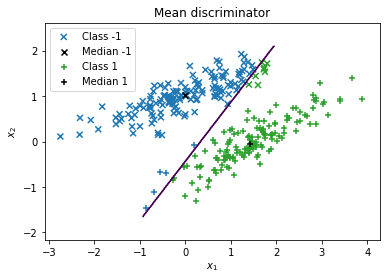

In [9]:
lmda = LinearDiscriminantAnalysis()
means = [np.median(features[labels == -1], axis=0), np.median(features[labels == 1], axis=0)] * 20
lmda.fit(means, [-1, 1] * 20)

plt.title("Mean discriminator")
predicted_labels = lmda.predict(features)
plot_decision_boundary(x_range, y_range, lmda)
plot_prediction(features, labels, predicted_labels)

## LDA

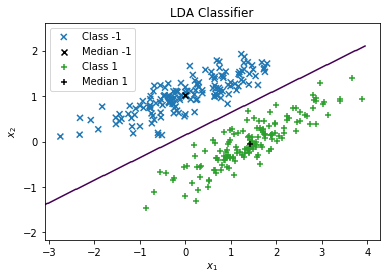

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(features, labels)

plt.title("LDA Classifier")
predicted_labels = lda.predict(features)
plot_decision_boundary(x_range, y_range, lda)
plot_prediction(features, labels, predicted_labels)

## LR

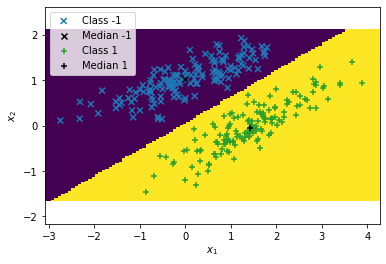

In [17]:
lr = LogisticRegression(solver="lbfgs")
lr.fit(features, labels)

predicted_labels = lr.predict(features)
plot_prediction_grid(x_range, y_range, lr)
plot_prediction(features, labels, predicted_labels)